<a href="https://colab.research.google.com/github/Yucheol-Son-BYUI/CSE310_W0_HelloWorld/blob/main/Unit3_Raison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
import pandas as pd


df = pd.read_csv('https://byui-cse.github.io/cse450-course/ice/raisins/data/raisin-training.csv')
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,97026,455.971591,273.053810,0.800869,99561,0.671205,1212.667,Kecimen
1,65253,418.997887,205.756185,0.871122,69700,0.666255,1075.404,Besni
2,113029,558.516156,265.284203,0.879996,116783,0.662092,1419.577,Besni
3,76792,338.857545,291.359202,0.510584,78842,0.772322,1042.770,Kecimen
4,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,Kecimen


## Data Definitions

- Area: Gives the number of pixels within the boundaries of the raisin.

- Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.

- MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.

- MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.

- Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.

- ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.

- Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.

- Class: Kecimen and Besni raisin.

In [ ]:
df.describe().round(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,698.000,698.000,698.000,698.000,698.000,698.000,698.000
mean,88085.169,431.940,255.201,0.780,91567.238,0.698,1169.532
std,38724.127,117.042,49.424,0.093,40718.359,0.055,276.135
min,25387.000,225.630,144.619,0.349,26139.000,0.380,619.074
25%,59549.000,345.358,220.925,0.740,61741.750,0.670,966.559
50%,79019.500,408.388,247.778,0.799,81651.000,0.706,1121.973
75%,105337.250,496.805,280.319,0.845,109174.500,0.734,1315.572
max,235047.000,997.292,492.275,0.962,278217.000,0.831,2697.753


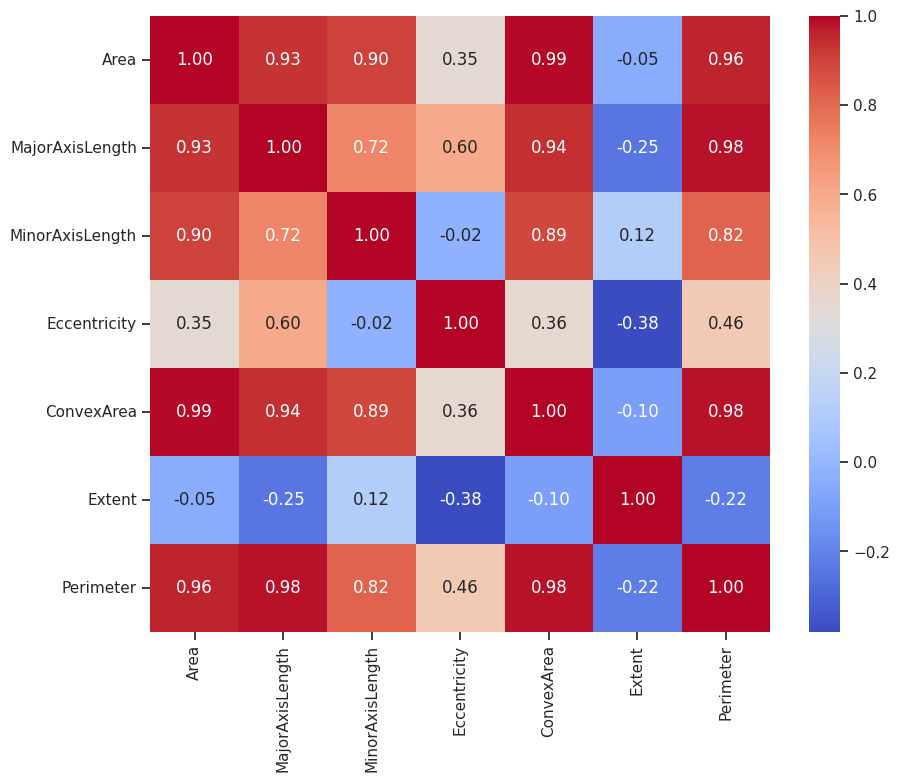

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# only numerical features(all)
numeric_df = df.drop(columns=['Class'])

# corr matrix
corr_matrix = numeric_df.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

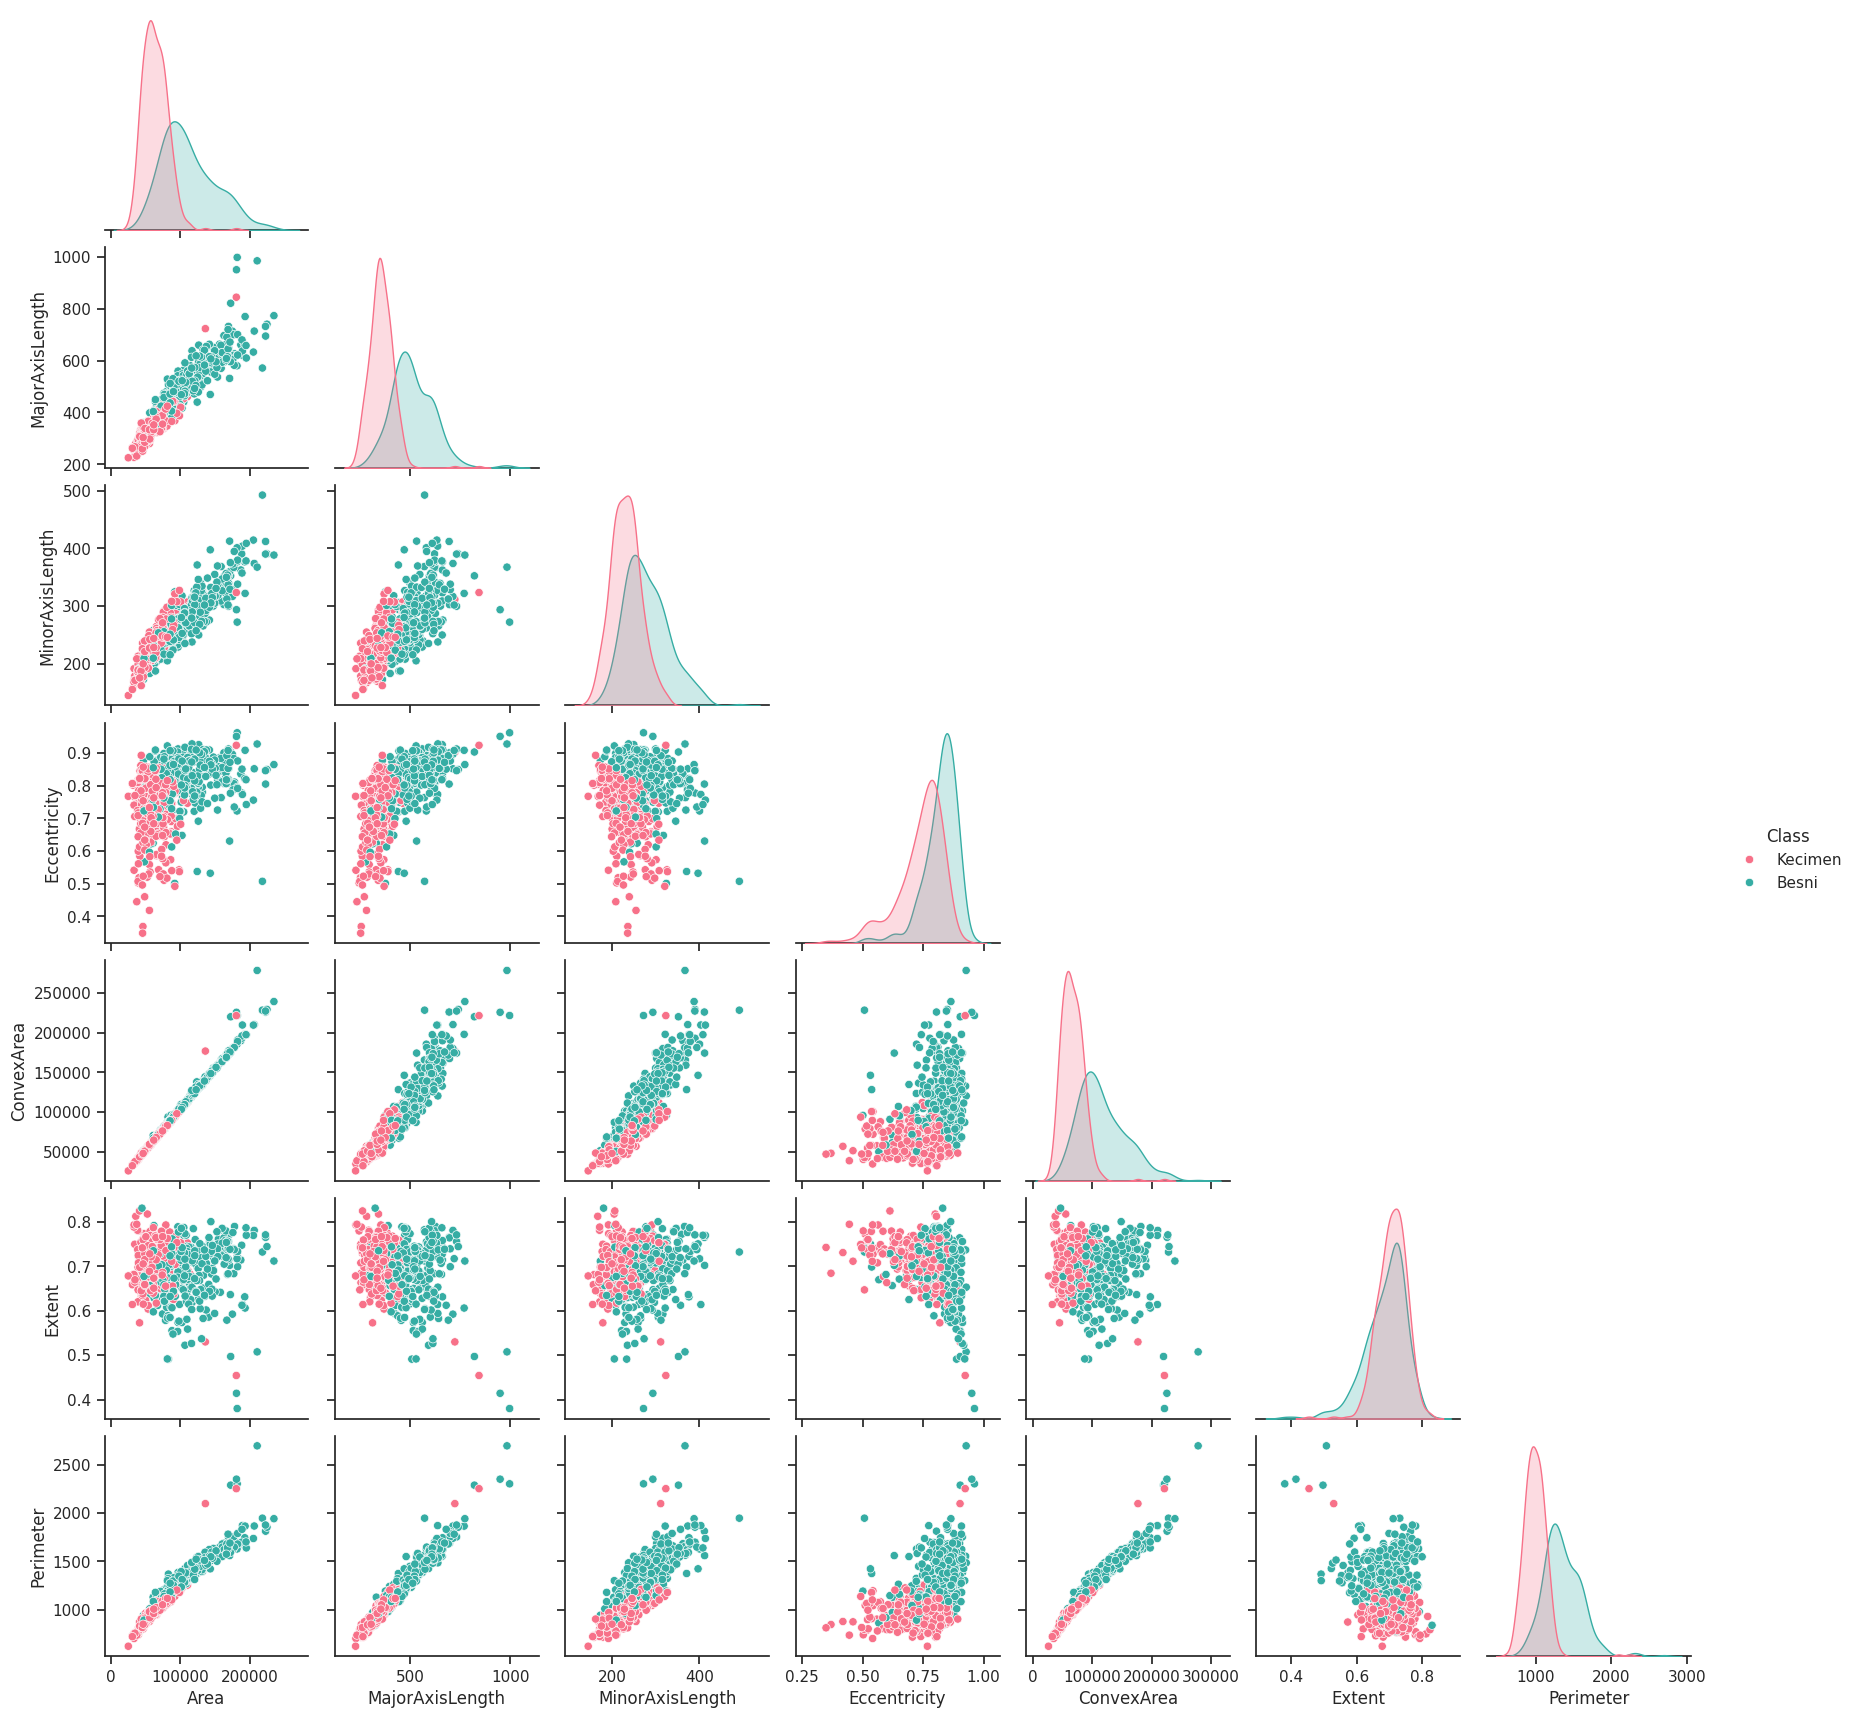

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot Matrix
sns.set_theme(style="ticks")
grid = sns.pairplot(df, hue='Class', palette='husl', corner=True, diag_kind='kde')
plt.show()

# Feature Engineering

In [ ]:
# Feature Engineering
df["wh_proportion"] = df["MajorAxisLength"] / df["MinorAxisLength"]
df["wrinkled"] = df["Area"] / df["ConvexArea"]

In [ ]:
##### RANDOM FOREST #####
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV

# X = df.drop('Class', axis=1)
# y = df['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Grid parameters
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5],
#     'max_features': ['sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, scoring='accuracy')

# grid_search.fit(X_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best CV Score: {grid_search.best_score_:.4f}")
# print(f"Test Accuracy (Best Model): {grid_search.best_estimator_.score(X_test, y_test):.4f}")


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# XG boost
le = LabelEncoder()
y_encoded = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Grid Parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                               cv=5, n_jobs=-1, scoring='accuracy')

# Traning
grid_search_xgb.fit(X_train, y_train)

# Report
best_xgb = grid_search_xgb.best_estimator_
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best CV Score: {grid_search_xgb.best_score_:.4f}")
print(f"Test Accuracy: {best_xgb.score(X_test, y_test):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:53:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 0.8675
Test Accuracy: 0.8786


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = best_xgb.predict(X_test)

print("### Classification Report ###")
print(classification_report(y_test, y_pred))


### Classification Report ###
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.85      0.93      0.89        72

    accuracy                           0.88       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.88      0.88      0.88       140




### 1차 ###
              precision    recall  f1-score   support

       Besni       0.90      0.84      0.87        68
     Kecimen       0.86      0.92      0.89        72

    accuracy                           0.88       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.88      0.88      0.88       140

### 2차 ###
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}

              precision    recall  f1-score   support

       Besni       0.90      0.82      0.86        68
     Kecimen       0.85      0.92      0.88        72

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140


### 3차 (XG boost classifer) ###
  bst.update(dtrain, iteration=i, fobj=obj)
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.85      0.93      0.89        72

    accuracy                           0.88       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.88      0.88      0.88       140


In [ ]:
import pandas as pd
import seaborn as sns

importances = grid_search_xgb.best_estimator_.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)

           Feature  Importance
1  MajorAxisLength    0.438620
6        Perimeter    0.192074
4       ConvexArea    0.084996
2  MinorAxisLength    0.065068
8         wrinkled    0.061636
7    wh_proportion    0.047540
3     Eccentricity    0.043925
0             Area    0.041465
5           Extent    0.024677


# HOLDOUT DATASET #

In [ ]:
holdout = pd.read_csv("https://byui-cse.github.io/cse450-course/ice/raisins/data/raisin-holdout.csv")
holdout.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,86545,350.127874,315.719520,0.432307,87512,0.785887,1070.062
1,102868,430.026092,312.972595,0.685790,106439,0.717931,1251.802
2,142415,532.084130,342.420733,0.765407,144862,0.770644,1449.803
3,97377,503.992068,252.499625,0.865448,101317,0.708423,1281.252
4,77468,405.936594,245.989798,0.795479,79220,0.721545,1100.676


In [ ]:
# Feature Engineering
holdout["wh_proportion"] = holdout["MajorAxisLength"] / holdout["MinorAxisLength"]
holdout["wrinkled"] = holdout["Area"] / holdout["ConvexArea"]

# predict
answer = best_xgb.predict(holdout)
my_predictions = pd.DataFrame(answer, columns=['predictions'])
my_predictions.to_csv("Yucheol_Son_Raison.csv", index=False)
print(answer)

[1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
